# Пример использования класса MyElascticLogisticRegression

In [1]:
from MyElasticLogisticRegression import MyElasticLogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import datasets
warnings.filterwarnings('ignore')

Посмотрим на перфоманс модели на исскуственных данных:

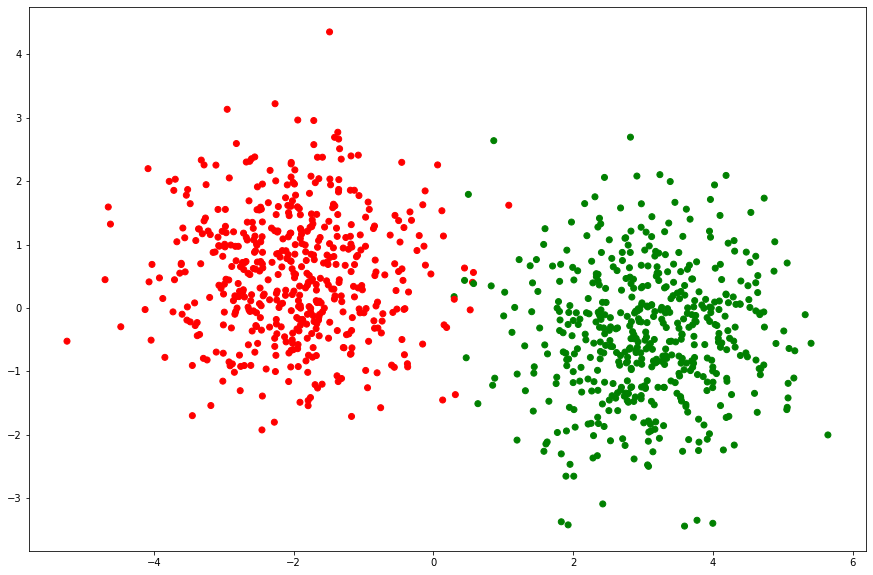

In [2]:
X, y = datasets.make_blobs(n_samples=1000, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [3]:
# задаем коэффициенты регуляризаций равными 0.1
clf = MyElasticLogisticRegression(0.1, 0.1)
clf.fit(X, y, epochs=1000)  # обучаем модель со 1000 эпохами, и размером батча 100 по умолчанию
w = clf.get_weights()  # получаем веса обученной модели

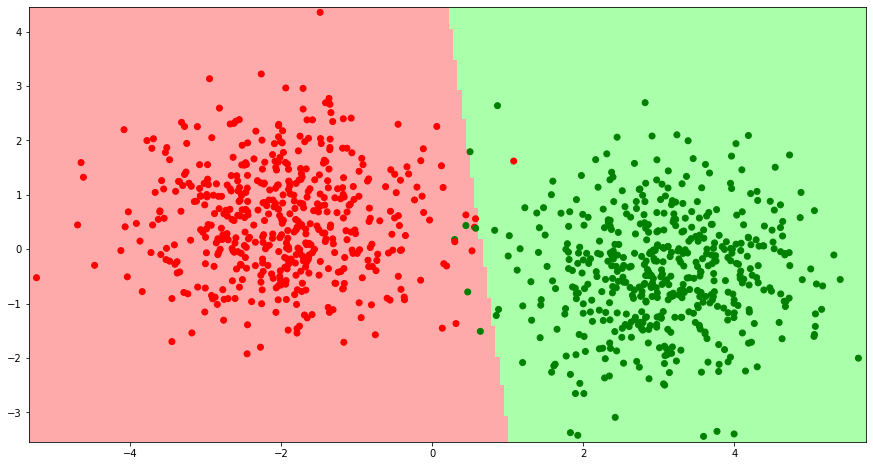

In [4]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y);

Видим, что наша модель довольно неплохо справилась, и разделила плоскость на 2 части (каждая из которых соответствует одному из классов)